## Location Clusters

There are large amount of location information of properties in our dataset. However, most of the location variables, such as raw census code and zipcode, are categorical variables and have more than 1000 levels. If we put all the variables into our models, it may lead to computational complexity and bad performance. In addition , we believe location is essential to real estate price, thus we try to generate a new location feature with less levels. Then we used all the location variables to cluster the properties by K-means method. Finally, we yielded 8 clusters as the levels of new locaiton feature.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import cPickle
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('train_V1.csv', index_col = 0)
train = train.set_index('Parcel_ID')
train.head()

,logerror,tran_date,AC_Type,Arch_Type,Basement_Area,Bath_Count,Bed_Count,Frame_Type,Quality_Level,Bed_with_bath_Count,...,Story_Count,Fireplace_YN,Tax_structure_Value,Tax_total_Value,Tax_assess_Year,Taxable_land_Value,Tax_Amount,Tax_delinq_YN,Tax_delinq_Year,Census
Parcel_ID,,,,,,,,,,,,,,,,,,,,,
11016594,0.0276,2016-01-01,1.0,Unknown,0.0,2.0,3.0,Unknown,4.0,2.0,...,-1.0,False,122754.0,360170.0,2015.0,237416.0,6735.88,N,-10000.0,60371066461000.0
14366692,-0.1684,2016-01-01,Unknown,Unknown,0.0,3.5,4.0,Unknown,-1.0,3.5,...,-1.0,False,346458.0,585529.0,2015.0,239071.0,10153.02,N,-10000.0,Unknown
12098116,-0.0040,2016-01-01,1.0,Unknown,0.0,3.0,2.0,Unknown,4.0,3.0,...,-1.0,False,61994.0,119906.0,2015.0,57912.0,11484.48,N,-10000.0,60374638003000.0
12643413,0.0218,2016-01-02,1.0,Unknown,0.0,2.0,2.0,Unknown,4.0,2.0,...,-1.0,False,171518.0,244880.0,2015.0,73362.0,3048.74,N,-10000.0,60372963002000.0
14432541,-0.0050,2016-01-02,Unknown,Unknown,0.0,2.5,4.0,Unknown,-1.0,2.5,...,2.0,False,169574.0,434551.0,2015.0,264977.0,5488.96,N,-10000.0,60590423381000.0


In [5]:
toobject = ["FIPS", "County", "City", "Neighborhood", "Raw_census", "Zipcode", "Land_Type"]

for col in toobject:
    train[col] = train[col].astype("object")
    
geo = ['FIPS', 'Latitude', 'Longitude', 'Raw_census', 'City', 'County', 'Neighborhood', 'Zipcode']
train_geo = train[geo]
X_geo = pd.get_dummies(train_geo)
X_tr = np.array(X_geo)

In [37]:
kmeans = KMeans(n_clusters = 8, random_state = 5)
kmeans.fit(X_tr)

After runing on server, we got the labels of clusters of our data.

In [6]:
f = open('clu_result.pl','r')
ctr, lbs = cPickle.load(f)
f.close()

In [8]:
train_geo['cluster'] = lbs

/Users/Rachel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
train_geo.to_csv('train_geo.csv')

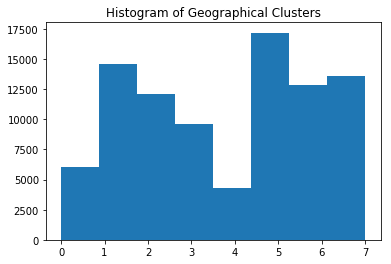

In [10]:
plt.hist(lbs, bins = 8)
plt.title('Histogram of Location Clusters')